<a href="https://colab.research.google.com/github/danishpeer/Deep-Learning/blob/main/Covid19usingResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
from keras.preprocessing import image
from keras.layers import *

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# !unzip /content/drive/MyDrive/Data.zip

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rescale=1/255.0,zoom_range=0.2,shear_range=0.2,horizontal_flip=True,validation_split=0.2)

In [ ]:
test_gen = ImageDataGenerator(rescale=1/255.0)

In [ ]:
image_generator = image_gen.flow_from_directory(
    '/content/Data/test',
    target_size = (224,224),
    class_mode = 'categorical',
    shuffle = True,
    batch_size = 32,
    subset = 'training'
)
val_generator = image_gen.flow_from_directory(
    '/content/Data/test',
    target_size = (224,224),
    class_mode = 'categorical',
    shuffle = True,
    batch_size = 32,
    subset = 'validation'
)

Found 347 images belonging to 2 classes.
Found 86 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
model = ResNet50(include_top = False,weights = 'imagenet',input_shape=(224,224,3))

In [ ]:
model.summary()

In [ ]:
gap1 = GlobalAveragePooling2D()(model.output)
fc1 = Dense(256,activation='relu')(gap1)
dp1 = Dropout(0.5)(fc1)
fc2 = Dense(2,activation='softmax')(dp1)

In [ ]:
from keras.models import Model

In [ ]:
newModel = Model(inputs = model.input,outputs = fc2)

In [ ]:
newModel.summary()

In [ ]:
for ix in range(len(newModel.layers)):
  print(ix,newModel.layers[ix])

In [ ]:
for i in range(170):
  newModel.layers[i].trainable = False

In [ ]:
newModel.summary()

In [ ]:
newModel.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00003),loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
his = newModel.fit_generator(image_generator,epochs = 50,validation_data=val_generator,steps_per_epoch = 10,validation_steps=2)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
10/10 [==============================] - 58s 6s/step - loss: 0.7259 - accuracy: 0.5556 - val_loss: 0.6675 - val_accuracy: 0.7188
Epoch 2/50
10/10 [==============================] - 54s 5s/step - loss: 0.5811 - accuracy: 0.7365 - val_loss: 0.6176 - val_accuracy: 0.7188
Epoch 3/50
10/10 [==============================] - 53s 5s/step - loss: 0.5928 - accuracy: 0.7206 - val_loss: 0.5987 - val_accuracy: 0.7500
Epoch 4/50
10/10 [==============================] - 54s 5s/step - loss: 0.5208 - accuracy: 0.7500 - val_loss: 0.5981 - val_accuracy: 0.7344
Epoch 5/50
10/10 [==============================] - 53s 5s/step - loss: 0.5304 - accuracy: 0.7429 - val_loss: 0.6045 - val_accuracy: 0.7188
Epoch 6/50
10/10 [==============================] - 54s 5s/step - loss: 0.4950 - accuracy: 0.7556 - val_loss: 0.5905 - val_accuracy: 0.7500
Epoch 7/50
10/10 [==============================] - 53s 5s/step - loss: 0.4459 - accuracy: 0.7937 - val_loss: 0.5713 - val_accuracy: 0.7656
Epoch 8/50
10/10 [==

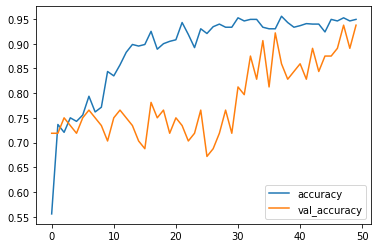

In [ ]:
plt.plot(his.history['accuracy'],label='accuracy')
plt.plot(his.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

In [ ]:
test_generator = test_gen.flow_from_directory(
  '/content/Data/test',
  target_size = (224,224)  
)

Found 433 images belonging to 2 classes.


In [ ]:
newModel.evaluate(test_generator)

14/14 [==============================] - 55s 4s/step - loss: 0.1470 - accuracy: 0.9538


[0.14700847864151, 0.9538106322288513]